In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os


In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random
from PIL import Image
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import Sequential, Model
from keras.layers import (Conv2D, MaxPooling2D, Dense, Flatten, \
                          Dropout, Input,GlobalAveragePooling2D,BatchNormalization)
from tensorflow.keras.activations import softmax
from tensorflow.keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
from mpl_toolkits.axes_grid1 import ImageGrid
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import (ConfusionMatrixDisplay, confusion_matrix, \
                             accuracy_score)

2023-02-09 08:03:34.809419: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
"""print("about to  start")
import getpass
import os

password = getpass.getpass()
command = "sudo -S apt-get install python3-opencv" #can be any command but don't forget -S as it enables input from stdin
os.system('echo %s | %s' % (password, command))

print("installation successful")"""

'print("about to  start")\nimport getpass\nimport os\n\npassword = getpass.getpass()\ncommand = "sudo -S apt-get install python3-opencv" #can be any command but don\'t forget -S as it enables input from stdin\nos.system(\'echo %s | %s\' % (password, command))\n\nprint("installation successful")'

In [4]:
our_folders = ['Acne and Rosacea Photos', \
              'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions', \
              'Melanoma Skin Cancer Nevi and Moles','Eczema Photos','Tinea Ringworm Candidiasis and other Fungal Infections',\
              'Vascular Tumors',\
              'Warts Molluscum and other Viral Infections']
print(len(our_folders))

7


In [5]:
test_dir = './test'

In [6]:
root_dir = './train'

In [7]:
acne_train_path = os.path.join(root_dir,'Acne and Rosacea Photos')
actinic_train_path = os.path.join(root_dir, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions')
melonama_train_path = os.path.join(root_dir, 'Melanoma Skin Cancer Nevi and Moles')
eczema_train_path = os.path.join(root_dir,'Eczema Photos')
tinea_ringWorm_train_path=os.path.join(root_dir,'Tinea Ringworm Candidiasis and other Fungal Infections')
vascularTumor_train_path = os.path.join(root_dir,'Vascular Tumors')
warts_Molluscum_train_path= os.path.join(root_dir,'Warts Molluscum and other Viral Infections')


In [8]:
acne_test_path = os.path.join(test_dir,'Acne and Rosacea Photos')
actinic_test_path = os.path.join(test_dir, 'Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions')
melonama_test_path = os.path.join(test_dir, 'Melanoma Skin Cancer Nevi and Moles')
eczema_test_path = os.path.join(test_dir,'Eczema Photos')
tinea_ringWorm_test_path=os.path.join(test_dir,'Tinea Ringworm Candidiasis and other Fungal Infections')
vascularTumor_test_path = os.path.join(test_dir,'Vascular Tumors')
warts_Molluscum_test_path= os.path.join(test_dir,'Warts Molluscum and other Viral Infections')


actinic_test_files = ([files_ for _, _, files_ in os.walk(actinic_test_path)])[0]
acne_test_files = ([files_ for _, _, files_ in os.walk(acne_test_path)])[0]
melonama_test_files = ([files_ for _, _, files_ in os.walk(melonama_test_path)])[0]
eczema_test_files = ([files_ for _, _, files_ in os.walk(eczema_test_path)])[0]
tinea_ringWorm_test_files = ([files_ for _, _, files_ in os.walk(tinea_ringWorm_test_path)])[0]
vascularTumor_test_files = ([files_ for _, _, files_ in os.walk(vascularTumor_test_path)])[0]
warts_Molluscum_test_files  = ([files_ for _, _, files_ in os.walk(warts_Molluscum_test_path)])[0]

In [9]:
train_dirs = []
for i in our_folders:
    for folder_,_, files_ in os.walk(f'../input/dermnet/train/{i}'):
        print(folder_)
        train_dirs.append(folder_)

In [10]:
actinic_train_files = ([files_ for _, _, files_ in os.walk(actinic_train_path)])[0]

In [11]:
acne_train_files = ([files_ for _, _, files_ in os.walk(acne_train_path)])[0]

In [12]:
melonama_train_files = ([files_ for _, _, files_ in os.walk(melonama_train_path)])[0]

In [13]:
eczema_train_files = ([files_ for _, _, files_ in os.walk(eczema_train_path)])[0]

In [14]:
tinea_ringWorm_train_files = ([files_ for _, _, files_ in os.walk(tinea_ringWorm_train_path)])[0]

In [15]:
vascularTumor_train_files = ([files_ for _, _, files_ in os.walk(vascularTumor_train_path)])[0]

In [16]:
warts_Molluscum_train_files = ([files_ for _, _, files_ in os.walk(warts_Molluscum_train_path)])[0]

In [17]:
def plotGridImages(d_name, list_files, train_path,nrows= 1, ncols=5):
    # for folder_name in our_folders:
    fig = plt.figure(1, figsize=(30, 30))
    grid = ImageGrid(fig, 111, nrows_ncols=(nrows, ncols), axes_pad=0.05)
    print(f"{d_name}")
    for i, img_id in enumerate(random.sample(list_files,ncols)):
        ax = grid[i]
        image_dir_path = os.path.join(train_path, img_id)
        img = image.load_img(image_dir_path, (224, 224))
        img = image.img_to_array(img)
        ax.imshow(img / 255.)
        ax.text(10, 200, 'LABEL: %s' % d_name, color='k', backgroundcolor='w',\
        alpha=0.8)
        ax.axis('off')
    # plt.tight_layout()
    plt.show()

Melonama


/home/adewonise/anaconda3/lib/python3.9/site-packages/keras/utils/image_utils.py:409: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn(


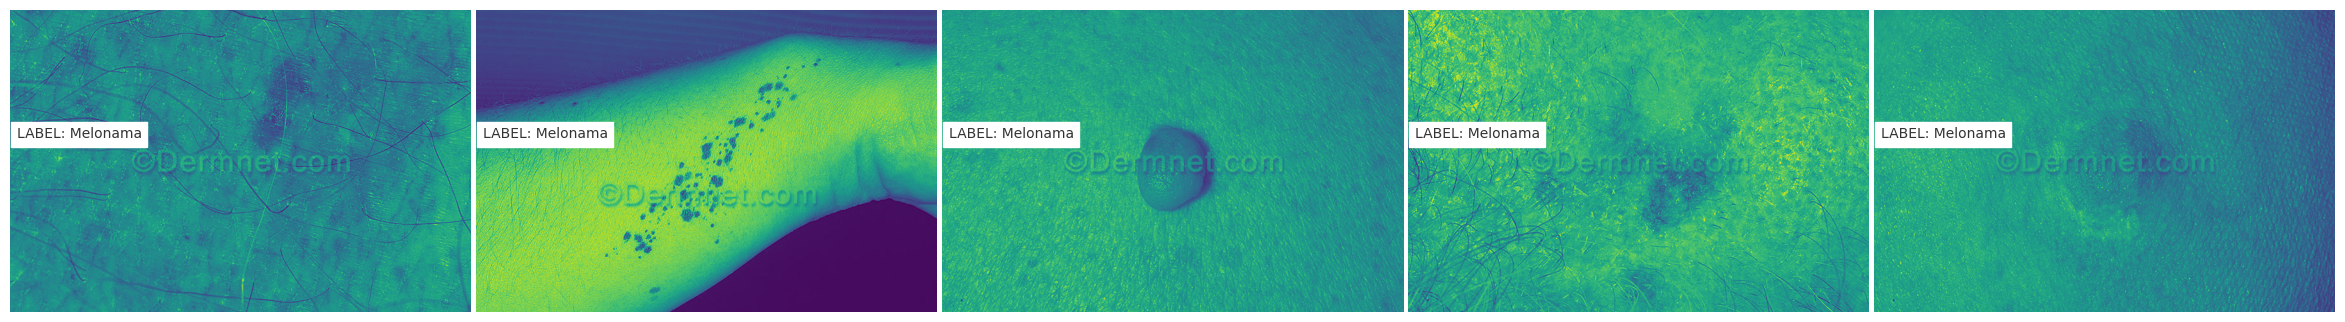

In [18]:
plotGridImages('Melonama',melonama_train_files, melonama_train_path,ncols=5)

Acne


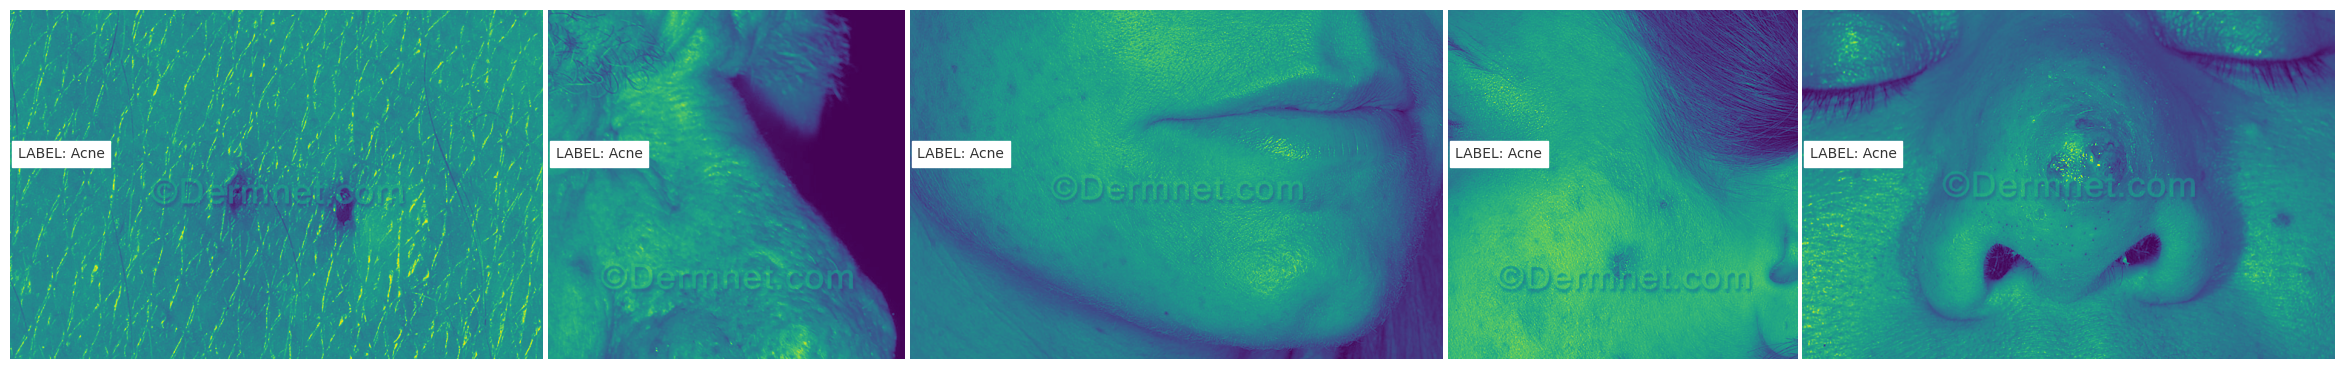

In [19]:
plotGridImages('Acne',acne_train_files, acne_train_path,ncols=5)

Actinic


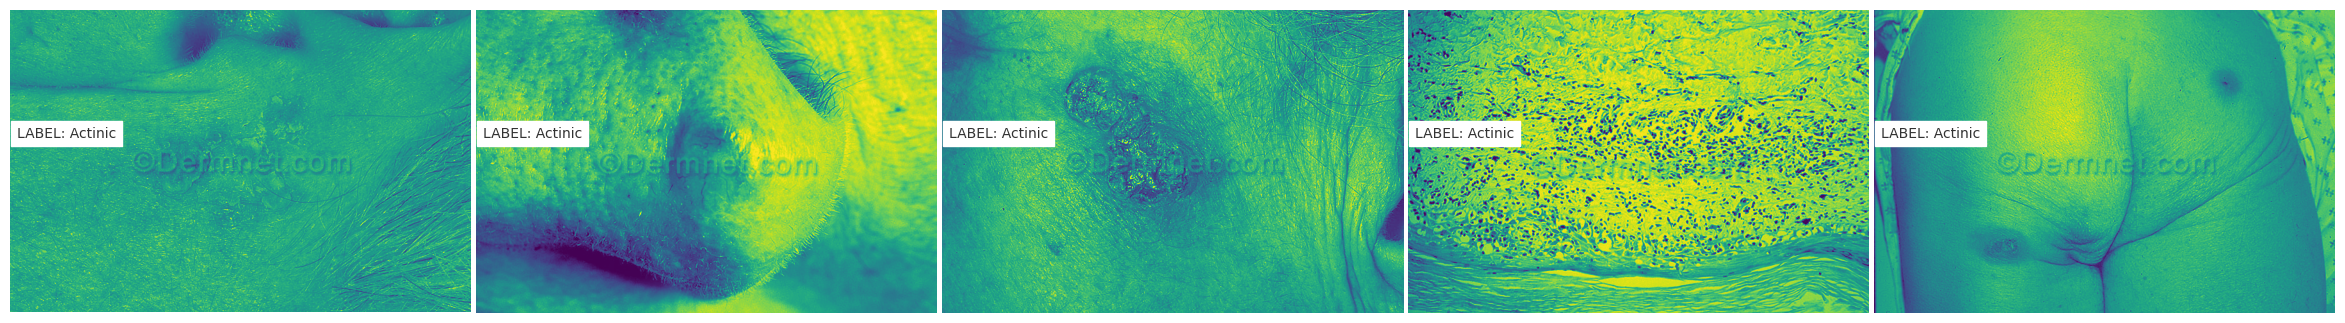

In [20]:
plotGridImages('Actinic',actinic_train_files, actinic_train_path,ncols=5)

Eczema


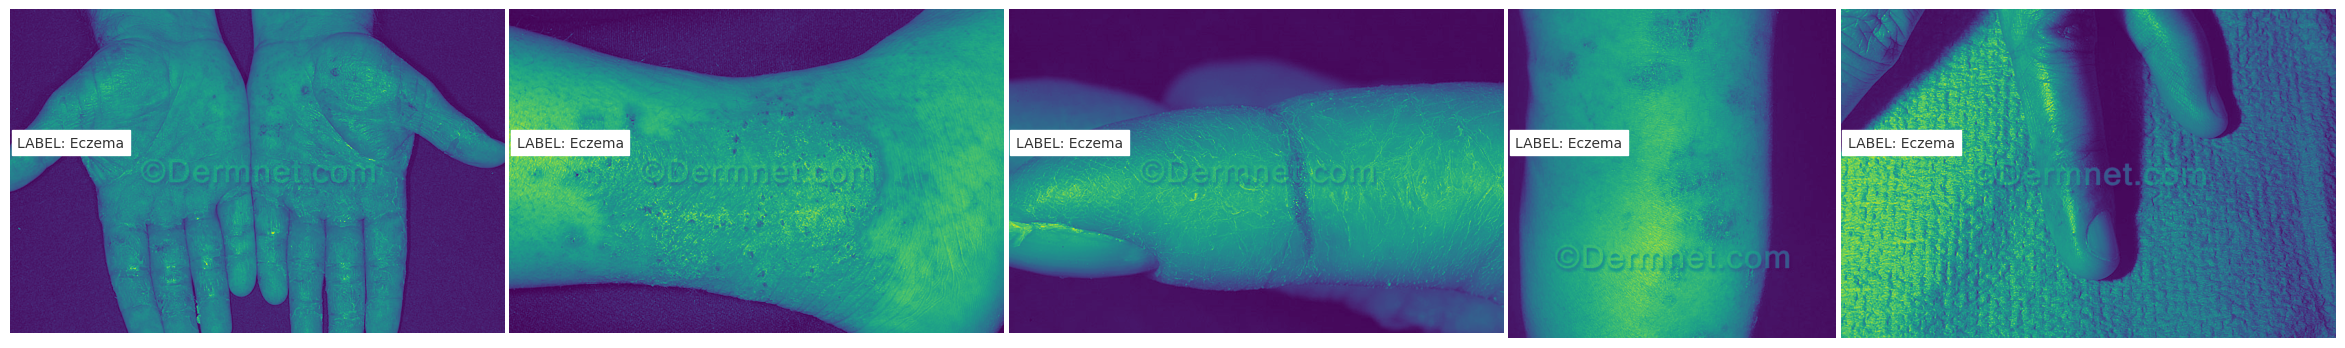

In [21]:
plotGridImages('Eczema',eczema_train_files, eczema_train_path,ncols=5)

Tinea Ringworm


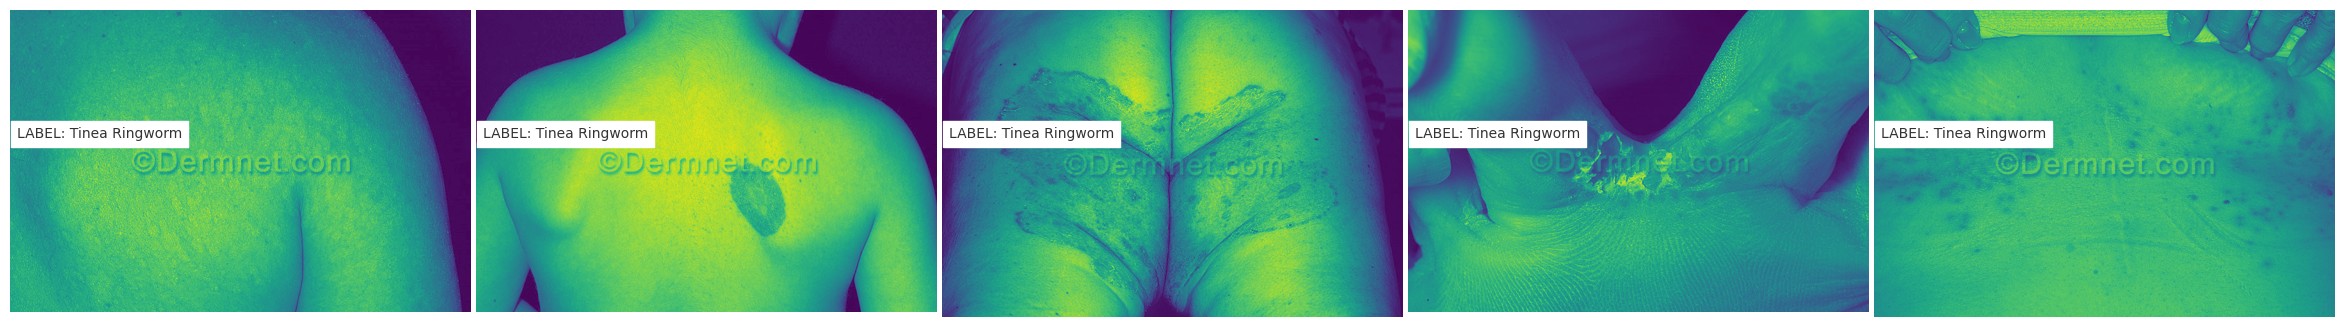

In [22]:
plotGridImages('Tinea Ringworm',tinea_ringWorm_train_files, tinea_ringWorm_train_path,ncols=5)

In [23]:
final_df = pd.DataFrame()

In [24]:
melonama_df = pd.DataFrame()
melonama_df['Image'] = [melonama_train_path+'/'+img for img in melonama_train_files]
melonama_df['Label'] = "melonama"

In [25]:
melonama_df.shape

(463, 2)

In [26]:
actinic_df = pd.DataFrame()
actinic_df['Image'] =  [actinic_train_path+'/'+img for img in actinic_train_files]
actinic_df['Label'] = "actinic"

In [27]:
actinic_df.shape

(1149, 2)

In [28]:
acne_df = pd.DataFrame()
acne_df['Image'] =  [acne_train_path+'/'+img for img in acne_train_files]
acne_df['Label'] = "acne"

In [29]:
acne_df.shape

(840, 2)

In [30]:
eczema_df = pd.DataFrame()
eczema_df['Image'] =  [eczema_train_path+'/'+img for img in eczema_train_files]
eczema_df['Label'] = "eczema"

eczema_df.shape

(1235, 2)

In [31]:
tinea_ringWorm_df = pd.DataFrame()
tinea_ringWorm_df['Image'] =  [tinea_ringWorm_train_path+'/'+img for img in tinea_ringWorm_train_files]
tinea_ringWorm_df['Label'] = "Tinea_ringWorm"

tinea_ringWorm_df.shape

(1300, 2)

In [32]:
vascularTumor_df = pd.DataFrame()
vascularTumor_df['Image'] =  [vascularTumor_train_path+'/'+img for img in vascularTumor_train_files]
vascularTumor_df['Label'] = "vascularTumor"

vascularTumor_df.shape

(482, 2)

In [33]:
warts_Molluscum_df = pd.DataFrame()
warts_Molluscum_df['Image'] =  [warts_Molluscum_train_path+'/'+img for img in warts_Molluscum_train_files]
warts_Molluscum_df['Label'] = "wartsMolluscum"

warts_Molluscum_df.shape

(1086, 2)

In [34]:
final_df = final_df.append([actinic_df, melonama_df, acne_df,eczema_df,tinea_ringWorm_df,vascularTumor_df,warts_Molluscum_df])

/tmp/ipykernel_7135/2715946930.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append([actinic_df, melonama_df, acne_df,eczema_df,tinea_ringWorm_df,vascularTumor_df,warts_Molluscum_df])


In [35]:
final_df.shape

(6555, 2)

In [36]:
final_df.sample(10)

Image           Label
591         ./train/Eczema Photos/eczema-areola-22.jpg          eczema
677  ./train/Warts Molluscum and other Viral Infect...  wartsMolluscum
57           ./train/Eczema Photos/eczema-hand-106.jpg          eczema
943  ./train/Actinic Keratosis Basal Cell Carcinoma...         actinic
340  ./train/Warts Molluscum and other Viral Infect...  wartsMolluscum
732  ./train/Actinic Keratosis Basal Cell Carcinoma...         actinic
807  ./train/Acne and Rosacea Photos/acne-open-come...            acne
770  ./train/Tinea Ringworm Candidiasis and other F...  Tinea_ringWorm
264  ./train/Warts Molluscum and other Viral Infect...  wartsMolluscum
202  ./train/Tinea Ringworm Candidiasis and other F...  Tinea_ringWorm

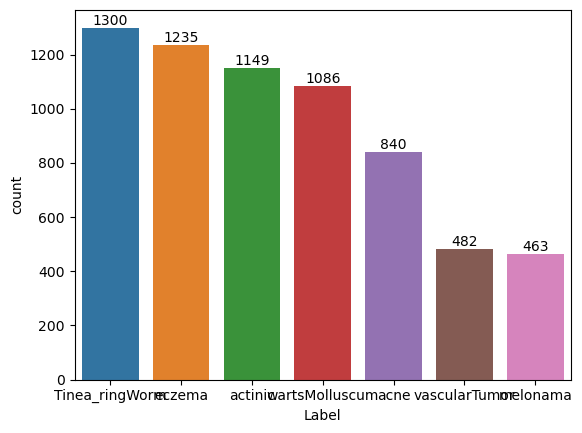

In [59]:
ax = sns.countplot(x=final_df['Label'],
                   order=final_df['Label'].value_counts(ascending=False).index);

abs_values = final_df['Label'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

In [60]:
# Observation: Imabalnced dataset

In [61]:
final_test_df = pd.DataFrame()
################# melonama #########

melonama_test_df = pd.DataFrame()
melonama_test_df['Image'] = [melonama_test_path+'/'+img for img in melonama_test_files]
melonama_test_df['Label'] = "melonama"

##################  actinic  ##########

actinic_test_df = pd.DataFrame()
actinic_test_df['Image'] =  [actinic_test_path+'/'+img for img in actinic_test_files]
actinic_test_df['Label'] = "actinic"

################  acne  ##########

acne_test_df = pd.DataFrame()
acne_test_df['Image'] =  [acne_test_path+'/'+img for img in acne_test_files]
acne_test_df['Label'] = "acne"

################  eczema  ##########

eczema_test_df = pd.DataFrame()
eczema_test_df['Image'] =  [eczema_test_path+'/'+img for img in eczema_test_files]
eczema_test_df['Label'] = "eczema"

################  tinea_ringWorm  ##########

tinea_ringWorm_test_df = pd.DataFrame()
tinea_ringWorm_test_df['Image'] =  [tinea_ringWorm_test_path+'/'+img for img in tinea_ringWorm_test_files]
tinea_ringWorm_test_df['Label'] = "Tinea_ringWorm"

################  vascularTumor  ##########

vascularTumor_test_df = pd.DataFrame()
vascularTumor_test_df['Image'] =  [vascularTumor_test_path+'/'+img for img in vascularTumor_test_files]
vascularTumor_test_df['Label'] = "vascularTumor"

################  tinea_ringWorm  ##########

warts_Molluscum_test_df = pd.DataFrame()
warts_Molluscum_test_df['Image'] =  [warts_Molluscum_test_path+'/'+img for img in warts_Molluscum_test_files]
warts_Molluscum_test_df['Label'] = "warts_Molluscum"



###########################################
###########################################

final_test_df = final_test_df.append([actinic_test_df, 
                                      melonama_test_df, 
                                      acne_test_df,
                                      eczema_test_df,
                                      tinea_ringWorm_test_df,
                                     vascularTumor_test_df,
                                      warts_Molluscum_test_df
                                     ])

final_test_df.shape

/tmp/ipykernel_16199/460787545.py:49: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_test_df = final_test_df.append([actinic_test_df,


(1743, 2)

In [62]:
# applying image augmentation techniques

In [63]:
train_data_gen  = ImageDataGenerator(
                                    rescale=1 / 255.0,
                                    rotation_range=40,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip = True,
                                    vertical_flip = True,
                                    validation_split=0.2,
                                    fill_mode='nearest')
test_data_gen = ImageDataGenerator(rescale=1 / 255.0)

In [64]:
batch_size = 8
train_generator = train_data_gen.flow_from_dataframe(
    dataframe=final_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical",#sparse
    subset='training',
    shuffle=True,
    seed=42
)
valid_generator = train_data_gen.flow_from_dataframe(
    dataframe=final_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode="categorical", #sparse
    subset='validation',
    shuffle=True,
    seed=42 
)
test_generator = test_data_gen.flow_from_dataframe(
    dataframe=final_test_df,
    x_col="Image",
    y_col="Label",
    target_size=(256, 256),
    batch_size=1,
    class_mode='categorical',
    shuffle=False,
)

Found 5244 validated image filenames belonging to 7 classes.
Found 1311 validated image filenames belonging to 7 classes.
Found 1743 validated image filenames belonging to 7 classes.


In [65]:
# VGG16 with Input shape of our Images
# Include Top is set to false to allow us to add more layers

res = VGG16(weights ='imagenet', include_top = False, 
               input_shape = (256, 256, 3)) 
               
# Setting the trainable to false
res.trainable = False


x= res.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)
# x = Dropout(0.5)(x) 
x = Dense(512, activation ='relu')(x)
x = BatchNormalization()(x)
# x = Dropout(0.5)(x)

x = Dense(256, activation ='relu')(x)
x = BatchNormalization()(x)

x = Dense(7, activation ='softmax')(x)
model = Model(res.input, x)

model.compile(optimizer =tf.keras.optimizers.RMSprop(learning_rate=0.0001),  #'Adam'
              loss ="categorical_crossentropy",  #sparse_categorical_crossentropy
              metrics =["categorical_accuracy"])  #sparse_categorical_accuracy

model.summary()

2023-01-20 17:01:26.180847: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-20 17:01:26.182068: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


58889256/58889256 [==============================] - 19s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                             

In [66]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [67]:
custom_early_stopping = EarlyStopping(
    monitor='val_loss', 
    patience=10, 
    min_delta=0.001, 
    mode='min'
)

In [ ]:
history = model.fit(train_generator, 
                    epochs=50, 
                    validation_data=valid_generator,
                   callbacks=[custom_early_stopping])

Epoch 1/50
179/656 [=======>......................] - ETA: 25:31 - loss: 2.2605 - categorical_accuracy: 0.2311

Accuracy plot

In [ ]:
#plot accuracy vs epoch
plt.plot(history.history['categorical_accuracy']) #sparse_categorical_accuracy
plt.plot(history.history['val_categorical_accuracy']) #val_sparse_categorical_accuracy
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Loss plot

In [ ]:
# Plot loss values vs epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
test_true=test_generator.classes
test_pred_raw = model.predict(test_generator)
test_pred = np.argmax(test_pred_raw, axis=1)

cm = confusion_matrix(test_true, test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['acne','actinic','melonama'])
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.show()

In [ ]:
result = model.evaluate(test_generator,batch_size=32)
print("test_loss, test accuracy",result)

In [ ]:
vgg_preds = model.predict(test_generator)
vgg_pred_classes = np.argmax(vgg_preds, axis=1)

In [ ]:
true_classes = test_generator.classes
class_indices = train_generator.class_indices
class_indices = dict((v,k) for k,v in class_indices.items())


vgg_acc = accuracy_score(true_classes, vgg_pred_classes)
print("VGG16 Model Accuracy: {:.2f}%".format(vgg_acc * 100))

In [ ]:
# Test dataset accuracy is 69.6%

In [ ]:
img = tf.keras.utils.load_img(
    '../input/dermnet/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-keratosis-5FU-32.jpg',
    target_size=(256, 256)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

In [ ]:
score = tf.nn.softmax(predictions[0])

class_names = list(train_generator.class_indices)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

In [ ]:
from keras.preprocessing import image
def predict_image_class(image_path,true_value):

    img = cv2.imread(image_path)
    img = cv2.resize(img,(256,256))

    img = np.expand_dims(img, axis=0)

    img_class = model.predict(img, batch_size=1)
    
    score = tf.nn.softmax(img_class[0])

    class_names = list(train_generator.class_indices)

    print(
        "This image most likely belongs to {}"
        .format(class_names[np.argmax(score)])
    )
    
    
    # for folder_name in our_folders:
    fig = plt.figure(1, figsize=(15, 15))
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 1), axes_pad=0.05)
    ax = grid[0]
    img = image.load_img(image_path, (256, 256))
    img = image.img_to_array(img)
    ax.imshow(img / 255.)
    
    ax.text(10, 150, 'True Label: %s' % true_value.upper(), color='g', backgroundcolor='w',\
    alpha=0.8, size = 20)
    
    ax.text(10, 200, 'Predicted Label: %s' % class_names[np.argmax(score)].upper(), color='k', backgroundcolor='w',\
    alpha=0.8, size = 20)
    ax.axis('off')
    plt.show()

In [ ]:
predict_image_class('../input/dermnet/test/Actinic Keratosis Basal Cell Carcinoma and other Malignant Lesions/actinic-keratosis-5FU-32.jpg','actinic')

In [ ]:
predict_image_class('../input/dermnet/train/Melanoma Skin Cancer Nevi and Moles/atypical-nevi-13.jpg','Melanoma')

In [ ]:
predict_image_class('../input/dermnet/test/Acne and Rosacea Photos/07RosaceaFulFAce.jpg','Acne')

In [ ]:
# Wrong predictions
predict_image_class('../input/dermnet/test/Acne and Rosacea Photos/Forest-2.jpg','unknown')